# Figure 6. BFMM

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from models import load_bfmm_fit
from utils import vonmises_pdf, round_df_angles, get_response_df, min_angle
from data import load_data
from vis import plot_bfmm_illustration, plot_model_bias, plot_data_bias, set_export_style, set_axes_rad, FREE_COLOR, RAND_COLOR, KAPPA_OBS_PALETTE

save_fig = False

### Figure 6A. BFMM illustration

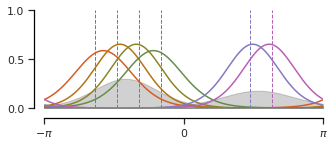

In [4]:
## BFMM Illustration ##

# values from test fit in notebook 45
presented = [-2, -1.5, -1, -0.5, 1.5, 2]
mus = [-1.80850281, -1.4319605 , -1.06618013, -0.67574717,  1.55788853, 1.92731855]
kappas = [2.5, 3, 3, 2.5, 3, 3]
cluster_mus = [-1.31135549,  1.67614503]
cluster_kappas = [2, 1.5 ]
w = [0.58447738, 0.41552262]

fig, ax = plot_bfmm_illustration(presented, mus, kappas, cluster_mus, cluster_kappas, w)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

set_export_style(fig, [ax], figsize=(5, 1.8))

if save_fig:
    plt.savefig('../figures/fig_05-01_bfmm_illustration.png', bbox_inches='tight', dpi=800)

plt.show()

### Figure 6B (upper). BFMM component distributions

In [2]:
def get_unique_components(df_fit, var='mu_hat'):
    """gets number of unique components for each trial (using var)
    """
    set_size = df_fit.attrs['data_params']['set_size']
    mu_cols = [f'{var}_{i}' for i in (np.arange(set_size) + 1)]
    mu_df = pd.DataFrame(df_fit[mu_cols].to_numpy().T)
    df_fit['n_components'] = mu_df.nunique().to_numpy()

    return df_fit

In [ ]:
# load and process bfmm fits for plotting; concatenate into single dataframe 
# (takes a while...)

modality = 'color'
conditions = ['free', 'rand'] 
datasets = ['continuous', 'discrete']
kappas = [5, 10, 20]
K = 6
set_size = 6
var_list = ['presented_rad', 'reported_rad', 'theta_hat', 'mu_hat']
trial_var_list = ['n_components']

df_list = []
for dataset in datasets:
    for condition in conditions:
        for kappa_obs in kappas:
            temp_df = load_bfmm_fit(modality, condition, dataset, set_size, kappa_obs, K)

            temp_df = get_unique_components(temp_df)
            temp_df = get_response_df(temp_df, var_list, trial_var_list)
            temp_df['kappa_obs'] = kappa_obs
            temp_df['dataset'] = dataset
            temp_df['condition'] = condition
            n_angles = 360 if dataset == 'continuous' else 8
            temp_df = round_df_angles(temp_df, var='theta_hat', n_angles=n_angles)
            df_list.append(temp_df)
    
df_fit = pd.concat(df_list).reset_index(drop=True)
df_fit['relative_mean'] = min_angle(df_fit['presented_rad'], df_fit['mu_hat'], radians=True)

In [ ]:
# plot distribution of active components
g = sns.displot(data=df_fit, x='n_components', hue='kappa_obs', col='kappa_obs', 
                bins=np.linspace(0.5, 6.5, 7), legend=False, palette=KAPPA_OBS_PALETTE, 
                stat='probability', kind='hist', alpha=1)

fig = plt.gcf()

set_export_style(fig, g.axes[0,:], figsize=(7, 2))

for ax in g.axes[0,:]:
    ax.set_xticks(np.array(range(5)) + 2)
    ax.set_xlim([1, 6.5])
    ax.set_ylim([0, 0.2])
    ax.set_yticks([])

    ax.spines['bottom'].set_position(('outward', 10))
    ax.spines['bottom'].set_bounds((2, 6))
    ax.spines['right'].set_visible(False)    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')

g.axes[0, 0].spines['left'].set_visible(True)
g.axes[0, 0].set_yticks([0, 0.1, 0.2])

if save_fig:
    plt.savefig('../figures/fig_05-02_bfmm_component_dist.pdf', bbox_inches='tight', dpi=800)

plt.show()

### Figure 6B (lower). BFMM distance to component mean distribution

In [ ]:
# plot distribution of relative means
g = sns.displot(data=df_fit, x='relative_mean', hue='kappa_obs', col='kappa_obs', bins=90, 
                legend=False, palette=KAPPA_OBS_PALETTE, stat='density', kind='hist', 
                element='step', alpha=0.7)

fig = plt.gcf()

set_export_style(fig, g.axes[0,:], figsize=(7, 2))

for ax in g.axes[0,:]:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlim([-np.pi, np.pi])
    ax.set_ylim([0, 0.5])
    ax.set_yticks([])

    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')

g.axes[0, 0].spines['left'].set_visible(True)
g.axes[0, 0].spines['bottom'].set_visible(True)
g.axes[0, 0].spines['left'].set_position(('outward',10))
g.axes[0, 0].spines['bottom'].set_position(('outward',10))
g.axes[0, 0].set_yticks([0, 0.25, 0.5])
g.axes[0, 0].set_xticks([-np.pi, 0, np.pi])
g.axes[0, 0].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])

if save_fig:
    plt.savefig('../figures/fig_05-03_bfmm_relative_mean_dist.pdf', bbox_inches='tight', dpi=800)

plt.show()